# Data Storytelling

El dataset seleccionado para nuestro proyecto nos permite realizar distintos tipos de análisis para presentar al cliente. 

En este desafío en particular nos dedicaremos a presentar hipótesis y ciertas preguntas que nos surgen a la hora de analizar nuestros datos y entender mediante visualizaciones útiles y funcionales a nuestro objetivo si nuestras hipótesis se cumplen o no. 

Las primeras preguntas e hipótesis que nos planteamos son las siguientes:



1. ¿Existe una relación entre la cantidad de incidentes, armas involucradas, heridos y muertes con la población total o la densidad de la población de cada estado?

2. De existir dicha relación: ¿Es consistente en todas las métricas, o será que ciertos estados tienen mas muertes que heridos por habitante?





Comenzamos por importar las librerías necesarias para trabajar nuestros datos como así también nuestro dataset original.

In [5]:
#importamos librerías necesarias y generamos dataframe a partir de los datos
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import json
import plotly.express as px
from plotly.subplots import make_subplots

url='https://drive.google.com/file/d/1zxBfJMACmFZYrdFRNihu1-QFtkpjB2IA/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
gun_violence = pd.read_csv(dwn_url)
gun_violence_map = pd.read_csv(dwn_url)


C:\Users\herna\AppData\Local\Temp\ipykernel_14244\2012644304.py:16: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dwn_url)
C:\Users\herna\AppData\Local\Temp\ipykernel_14244\2012644304.py:17: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  gun_violence = pd.read_csv(dwn_url)
C:\Users\herna\AppData\Local\Temp\ipykernel_14244\2012644304.py:18: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  gun_violence_map = pd.read_csv(dwn_url)


In [6]:
#revisamos el datframe
gun_violence.nunique()

incident_id                 184311
date                          1720
state                           51
city_or_county               11854
n_killed                        16
n_injured                       23
congressional_district          54
gun_stolen                     300
gun_type                      2042
incident_characteristics     16221
latitude                     90622
longitude                    98398
n_guns_involved                 85
participant_age              17765
participant_age_group          755
participant_gender             811
participant_status            1961
participant_type               250
state_house_district           480
state_senate_district          137
dtype: int64

In [7]:
#agregamos una columna con el número 1 en todos los registros
gun_violence['incident_amount'] = 1
gun_violence.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,gun_stolen,gun_type,incident_characteristics,...,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,incident_amount
0,92114,2014-01-01,Kentucky,Lexington,0,1,6.0,NaN,NaN,Shot - Wounded/Injured,...,-84.4829,NaN,NaN,0::Adult 18+,0::Male,0::Injured,0::Victim,NaN,NaN,1
1,92117,2014-01-01,Kentucky,Cynthiana,0,1,4.0,0::Unknown,0::Unknown,Shot - Wounded/Injured||Accidental Shooting||A...,...,-84.3542,1.0,1::22,0::Adult 18+||1::Adult 18+,0::Male||1::Male,"0::Injured||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,78.0,27.0,1
2,92119,2014-01-01,Kentucky,Louisville,0,1,3.0,NaN,NaN,Shot - Wounded/Injured,...,-85.8150,NaN,NaN,0::Adult 18+,0::Male,0::Injured,0::Victim,NaN,NaN,1
3,92125,2014-01-01,Oklahoma,Lawton,0,0,4.0,NaN,NaN,Shots Fired - No Injuries,...,-98.4222,NaN,NaN,0::Adult 18+,0::Male||1::Male,0::Unharmed||1::Unharmed,0::Victim||1::Subject-Suspect,64.0,32.0,1
4,92131,2014-01-01,New York,Bronx,0,1,15.0,NaN,NaN,Pistol-whipping,...,-73.8628,NaN,0::23,0::Adult 18+,0::Male,0::Injured,0::Victim,85.0,34.0,1


Agrupamos los incidentes por estado, haciendo la suma de cuantos casos se dan en cada uno de ellos.

In [8]:
#sumando los incidentes por estado
gunstate = gun_violence.groupby(['state']).sum()
gunstate.sort_values(by=['state'])

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,incident_amount
state,,,,,,,,
Alabama,2618246239,1792,2761,20795.0,155059.1452,-4.082435e+05,2945.0,4702
Alaska,561301544,242,274,855.0,59977.2121,-1.447272e+05,886.0,969
Arizona,1033829197,1027,922,9681.0,60651.2574,-2.036460e+05,1356.0,1819
Arkansas,1347503971,714,1256,5058.0,80949.1791,-2.133034e+05,1642.0,2313
California,7727985868,5208,6621,296956.0,477624.3709,-1.587063e+06,11559.0,13241
Colorado,1200920299,685,752,7296.0,75827.1834,-2.033310e+05,1892.0,1931
Connecticut,1346042148,324,1111,6782.0,100863.4389,-1.774626e+05,1936.0,2434
Delaware,738210866,207,810,1271.0,57189.3739,-1.093449e+05,1025.0,1447
District of Columbia,806484031,415,1066,1599.0,67863.2094,-1.343440e+05,675.0,1745


In [9]:
#eliminando columnas inútiles para el análisis
gunstate = gunstate.drop(['incident_id', 'latitude', 'longitude', 'congressional_district'], axis=1)
gunstate

,n_killed,n_injured,n_guns_involved,incident_amount
state,,,,
Alabama,1792,2761,2945.0,4702
Alaska,242,274,886.0,969
Arizona,1027,922,1356.0,1819
Arkansas,714,1256,1642.0,2313
California,5208,6621,11559.0,13241
Colorado,685,752,1892.0,1931
Connecticut,324,1111,1936.0,2434
Delaware,207,810,1025.0,1447
District of Columbia,415,1066,675.0,1745


# Carga de datos desde API

Para responder las preguntas planteadas que pueden comprobar o descartar nuestras hipótesis, necesitamos tener información poblacional de cada estado como son la población total y la densidad de población de cada estado.

Para ello recurrimos a la API del censo de los Estados Unidos, buscando los datos acorde a un "punto medio" (año 2017) en el período de tiempo que abarca nuestro dataset (años 2014 al 2018)

Cargamos los datos desde la mencionada API y luego hacemos las transformaciones necesarias para que los datos obtenidos sean funcionales al análisis que queremos hacer (nombres de columnas, nombres de los estados, unidades correctas de medida)

In [10]:
#request a la api del censo de los Estados Unidos
url = '	https://api.census.gov/data/2017/pep/population?get=GEONAME,POP,DENSITY&for=state:*&key=0ea84fc1d807f3a05a1b798c393c4899f95f2ea8'
popdf = requests.get(url)
print(popdf)

<Response [200]>


In [11]:
#revisando que el resultado de la query sea el esperado
texto=popdf.text
json.loads(texto)

[['GEONAME', 'POP', 'DENSITY', 'state'],
 ['District of Columbia', '693972', '11350.556038994', '11'],
 ['Florida', '20984400', '391.2517592529', '12'],
 ['Georgia', '10429379', '181.0726286368', '13'],
 ['Hawaii', '1427538', '222.2724611482', '15'],
 ['Idaho', '1716943', '20.7750524526', '16'],
 ['Illinois', '12802023', '230.6032631544', '17'],
 ['Indiana', '6666818', '186.0911143001', '18'],
 ['Iowa', '3145711', '56.3190899978', '19'],
 ['Kansas', '2913123', '35.6308902986', '20'],
 ['Kentucky', '4454189', '112.8066570405', '21'],
 ['Louisiana', '4684333', '108.4168500336', '22'],
 ['Maine', '1335907', '43.3116115053', '23'],
 ['Maryland', '6052177', '623.2458025617', '24'],
 ['Massachusetts', '6859819', '879.3603267562', '25'],
 ['Alabama', '4874747', '96.2499788716', '01'],
 ['Alaska', '739795', '1.2958713802', '02'],
 ['Arizona', '7016270', '61.7679734094', '04'],
 ['Arkansas', '3004279', '57.7365602082', '05'],
 ['California', '39536653', '253.7886617079', '06'],
 ['Colorado', '5

In [12]:
#convirtiendo el json devuelto por la query a un dataframe de pandas
jsondata=json.loads(texto)
popdf2=pd.DataFrame.from_dict(jsondata)
popdf2.head()

,0,1,2,3
0,GEONAME,POP,DENSITY,state
1,District of Columbia,693972,11350.556038994,11
2,Florida,20984400,391.2517592529,12
3,Georgia,10429379,181.0726286368,13
4,Hawaii,1427538,222.2724611482,15


In [13]:
#convirtiendo la primera fila en los nombres de las columnas del dataframe
popdf2.columns = popdf2.iloc[0]
popdf2 = popdf2.iloc[1: , :]
popdf2.head()

,GEONAME,POP,DENSITY,state
1,District of Columbia,693972,11350.556038994,11
2,Florida,20984400,391.2517592529,12
3,Georgia,10429379,181.0726286368,13
4,Hawaii,1427538,222.2724611482,15
5,Idaho,1716943,20.7750524526,16


In [14]:
#chequeando nombres de las columnas
popdf2.columns

Index(['GEONAME', 'POP', 'DENSITY', 'state'], dtype='object', name=0)

In [15]:
#renombrando columnas del dataset
popdf2.columns = ['state', 'total_population', 'density_sq_mi', 'state_n']
popdf2.head()

,state,total_population,density_sq_mi,state_n
1,District of Columbia,693972,11350.556038994,11
2,Florida,20984400,391.2517592529,12
3,Georgia,10429379,181.0726286368,13
4,Hawaii,1427538,222.2724611482,15
5,Idaho,1716943,20.7750524526,16


In [16]:
#revisando tipo de dato de cada columna
popdf2.dtypes

state               object
total_population    object
density_sq_mi       object
state_n             object
dtype: object

In [17]:
#convirtiendo columnas de object a numéricas para poder realizar cálculos
popdf2 = popdf2.astype({"total_population": int, "density_sq_mi": float})
popdf2.dtypes

state                object
total_population      int32
density_sq_mi       float64
state_n              object
dtype: object

In [18]:
#creando columna de densidad por km2 a partir de la de densidad por mi2
popdf2['density_sq_km'] = popdf2['density_sq_mi']*0.3861 
popdf2.head()

,state,total_population,density_sq_mi,state_n,density_sq_km
1,District of Columbia,693972,11350.556039,11,4382.449687
2,Florida,20984400,391.251759,12,151.062304
3,Georgia,10429379,181.072629,13,69.912142
4,Hawaii,1427538,222.272461,15,85.819397
5,Idaho,1716943,20.775052,16,8.021248


In [19]:
#droppeando columnas inútiles para el análisis
popdf2 = popdf2.drop(['density_sq_mi', 'state_n'], axis=1)
popdf2.head()

,state,total_population,density_sq_km
1,District of Columbia,693972,4382.449687
2,Florida,20984400,151.062304
3,Georgia,10429379,69.912142
4,Hawaii,1427538,85.819397
5,Idaho,1716943,8.021248


In [20]:
#droppeando el estado de Puerto Rico dado que no está en el dataset original
popdf2.drop(popdf2.index[51])

,state,total_population,density_sq_km
1,District of Columbia,693972,4382.449687
2,Florida,20984400,151.062304
3,Georgia,10429379,69.912142
4,Hawaii,1427538,85.819397
5,Idaho,1716943,8.021248
6,Illinois,12802023,89.035920
7,Indiana,6666818,71.849779
8,Iowa,3145711,21.744801
9,Kansas,2913123,13.757087
10,Kentucky,4454189,43.554650


In [21]:
#mergeando los datos obtenidos del dataset inicial con los adquiridos de la api del censo
gunstatepop = pd.merge(gunstate, popdf2, on='state')

In [22]:
gunstatepop.sort_values(by=['total_population'])

,state,n_killed,n_injured,n_guns_involved,incident_amount,total_population,density_sq_km
50,Wyoming,69,43,162.0,169,579315,2.303741
45,Vermont,53,62,270.0,349,623657,26.123300
8,District of Columbia,415,1066,675.0,1745,693972,4382.449687
1,Alaska,242,274,886.0,969,739795,0.500336
34,North Dakota,55,102,316.0,379,755393,4.226887
41,South Dakota,68,92,441.0,324,869666,4.429245
7,Delaware,207,810,1025.0,1447,961939,190.586018
26,Montana,141,113,475.0,444,1050493,2.786727
39,Rhode Island,56,318,569.0,700,1059639,395.681107
19,Maine,109,129,661.0,632,1335907,16.722613


In [23]:
gunstatepop.describe()

,n_killed,n_injured,n_guns_involved,incident_amount,total_population,density_sq_km
count,51.000000,51.000000,51.000000,51.000000,5.100000e+01,51.000000
mean,1086.549020,1989.078431,2743.411765,3613.941176,6.386651e+06,162.472476
std,1144.205826,2274.836503,2573.297606,3427.796262,7.316763e+06,611.348343
min,53.000000,43.000000,162.000000,169.000000,5.793150e+05,0.500336
25%,241.500000,439.500000,855.000000,1095.500000,1.766400e+06,18.805755
50%,728.000000,1111.000000,1936.000000,2313.000000,4.454189e+06,41.830746
75%,1606.500000,2856.000000,3718.500000,4903.500000,7.211006e+06,87.427659
max,5208.000000,12553.000000,11559.000000,14701.000000,3.953665e+07,4382.449687


In [24]:
#definiendo un diccionario para pasar los nombres de los estados a sus abreviaciones de dos letras
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [25]:
#cambiando nombres de estados a su abreviación de 2 letras
gunstatepop = gunstatepop.replace({"state": us_state_to_abbrev})
gunstatepop

,state,n_killed,n_injured,n_guns_involved,incident_amount,total_population,density_sq_km
0,AL,1792,2761,2945.0,4702,4874747,37.162117
1,AK,242,274,886.0,969,739795,0.500336
2,AZ,1027,922,1356.0,1819,7016270,23.848615
3,AR,714,1256,1642.0,2313,3004279,22.292086
4,CA,5208,6621,11559.0,13241,39536653,97.987802
5,CO,685,752,1892.0,1931,5607154,20.888897
6,CT,324,1111,1936.0,2434,3588184,286.077708
7,DE,207,810,1025.0,1447,961939,190.586018
8,DC,415,1066,675.0,1745,693972,4382.449687
9,FL,3594,5846,8004.0,10775,20984400,151.062304


# Visualizaciones

Comenzaremos graficando el mapa de los Estados Unidos, el cual utilizaremos para todas nuestras visualizaciones. 

En este caso comenzaremos graficando según la población de cada estado, y a continuación según la densidad de población del mismo.

In [26]:
#graficamos cantidad y densidad de población por estado
fig = px.choropleth(gunstatepop,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='total_population',
                    color_continuous_scale="purp")

fig.update_layout(
      title_text = 'Población total por estado',
      title_font_family="Arial",
      title_font_size = 25,
      title_font_color="black", 
      title_x=0.45)

fig.show()



In [27]:
#graficamos densidad de población por estado
fig = px.choropleth(gunstatepop,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='density_sq_km',
                    color_continuous_scale="blackbody",
                    range_color= [0, 500] )

fig.update_layout(
      title_text = 'Densidad de población por estado',
      title_font_family="Arial",
      title_font_size = 25,
      title_font_color="black", 
      title_x=0.45)

fig.show()

In [28]:
#graficamos cantidad de incidentes por estado
fig = px.choropleth(gunstatepop,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='incident_amount',
                    color_continuous_scale="oranges")

fig.update_layout(
      title_text = 'Cantidad de incidentes por estado',
      title_font_family="Arial",
      title_font_size = 25,
      title_font_color="black", 
      title_x=0.45)

fig.show()

In [29]:
#graficamos cantidad de muertes por estado
fig = px.choropleth(gunstatepop,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='n_killed',
                    color_continuous_scale="reds")

fig.update_layout(
      title_text = 'Cantidad de muertes por estado',
      title_font_family="Arial",
      title_font_size = 25,
      title_font_color="black", 
      title_x=0.45)

fig.show()

In [30]:
#graficamos cantidad de heridos por estado
fig = px.choropleth(gunstatepop,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='n_injured',
                    color_continuous_scale="fall")

fig.update_layout(
      title_text = 'Cantidad de heridos por estado',
      title_font_family="Arial",
      title_font_size = 25,
      title_font_color="black", 
      title_x=0.45)

fig.show()

In [31]:
#graficamos cantidad de armas involucradas por estado
fig = px.choropleth(gunstatepop,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='n_guns_involved',
                    color_continuous_scale="teal")

fig.update_layout(
      title_text = 'Cantidad de armas involucradas por estado',
      title_font_family="Arial",
      title_font_size = 25,
      title_font_color="black", 
      title_x=0.45)

fig.show()

# Conclusiones Preliminares

En este punto del análisis ya podemos listar ciertas observaciones que nos acercan a tener una respuesta a nuestras hipótesis e interrogantes iniciales:

1. Aquellos estados con poblaciones y densidades de población superiores a la media son también los que tienen mayor cantidad de incidentes, muertes y heridos.

2. Resalta extrañamente el estado de Illinois, el cual a pesar de tener una población y densidad por debajo de la media, se encuentra entre los estados con mayor cantidad de incidentes, armas involucradas, muertes, y especialmente heridos.

# Calculo de ratios

Calculamos distintos ratios para poder graficarlos de la misma manera que las variables anteriores.

In [32]:
#chequeamos que todos los tipos de datos sean numéricos
gunstatepop.dtypes



state                object
n_killed              int64
n_injured             int64
n_guns_involved     float64
incident_amount       int64
total_population      int32
density_sq_km       float64
dtype: object

In [33]:
#transformamos la cantidad de armas involucradas a integer
gunstatepop['n_guns_involved'] = gunstatepop['n_guns_involved'].astype(int)


In [34]:
#calculo de ratios

#cantidad de incidentes por habitante
gunstatepop['incident_pop'] = gunstatepop['incident_amount'] / gunstatepop['total_population']

#cantidad de incidentes según la densidad de población
gunstatepop['incident_den'] = gunstatepop['incident_amount'] / gunstatepop['density_sq_km']

#cantidad de armas involucradas por habitante
gunstatepop['guns_pop'] = gunstatepop['n_guns_involved'] / gunstatepop['total_population']

#cantidad de armas involucradas según la densidad de población
gunstatepop['guns_den'] = gunstatepop['n_guns_involved'] / gunstatepop['density_sq_km']

#cantidad de muertes por habitante
gunstatepop['dead_pop'] = gunstatepop['n_killed'] / gunstatepop['total_population']

#cantidad de muertes según la densidad de población
gunstatepop['dead_den'] = gunstatepop['n_killed'] / gunstatepop['density_sq_km']

#cantidad de heridos por habitante
gunstatepop['injured_pop'] = gunstatepop['n_injured'] / gunstatepop['total_population']

#cantidad de heridos según la densidad de población
gunstatepop['injured_den'] = gunstatepop['n_injured'] / gunstatepop['density_sq_km']

gunstatepop

,state,n_killed,n_injured,n_guns_involved,incident_amount,total_population,density_sq_km,incident_pop,incident_den,guns_pop,guns_den,dead_pop,dead_den,injured_pop,injured_den
0,AL,1792,2761,2945,4702,4874747,37.162117,0.000965,126.526700,0.000604,79.247369,0.000368,48.221150,0.000566,74.296091
1,AK,242,274,886,969,739795,0.500336,0.001310,1936.698771,0.001198,1770.810228,0.000327,483.675029,0.000370,547.632057
2,AZ,1027,922,1356,1819,7016270,23.848615,0.000259,76.272775,0.000193,56.858649,0.000146,43.063298,0.000131,38.660527
3,AR,714,1256,1642,2313,3004279,22.292086,0.000770,103.758796,0.000547,73.658428,0.000238,32.029304,0.000418,56.342866
4,CA,5208,6621,11559,13241,39536653,97.987802,0.000335,135.129064,0.000292,117.963662,0.000132,53.149472,0.000167,67.569635
5,CO,685,752,1892,1931,5607154,20.888897,0.000344,92.441452,0.000337,90.574431,0.000122,32.792540,0.000134,35.999985
6,CT,324,1111,1936,2434,3588184,286.077708,0.000678,8.508178,0.000540,6.767392,0.000090,1.132559,0.000310,3.883560
7,DE,207,810,1025,1447,961939,190.586018,0.001504,7.592372,0.001066,5.378149,0.000215,1.086124,0.000842,4.250049
8,DC,415,1066,675,1745,693972,4382.449687,0.002515,0.398179,0.000973,0.154023,0.000598,0.094696,0.001536,0.243243
9,FL,3594,5846,8004,10775,20984400,151.062304,0.000513,71.328185,0.000381,52.984760,0.000171,23.791508,0.000279,38.699264


In [35]:
#graficamos cantidad de incidentes por habitante
fig = px.choropleth(gunstatepop,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='incident_pop',
                    color_continuous_scale="tealrose")

fig.update_layout(
      title_text = 'Cantidad de incidentes por habitante',
      title_font_family="Arial",
      title_font_size = 25,
      title_font_color="black", 
      title_x=0.45)

fig.show()

In [36]:
#graficamos cantidad de incidentes según la densidad de la población
fig = px.choropleth(gunstatepop,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='incident_den',
                    color_continuous_scale="tealrose")

fig.update_layout(
      title_text = 'Cantidad de incidentes según la densidad de la población',
      title_font_family="Arial",
      title_font_size = 25,
      title_font_color="black", 
      title_x=0.45)

fig.show()

In [37]:
#graficamos cantidad de armas involucradas por habitante
fig = px.choropleth(gunstatepop,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='guns_pop',
                    color_continuous_scale="plasma")

fig.update_layout(
      title_text = 'Cantidad de armas involucradas por habitante',
      title_font_family="Arial",
      title_font_size = 25,
      title_font_color="black", 
      title_x=0.45)

fig.show()

In [38]:
#graficamos cantidad de armas involucradas según la densidad de la población
fig = px.choropleth(gunstatepop,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='guns_den',
                    color_continuous_scale="plasma")

fig.update_layout(
      title_text = 'Cantidad de armas involucradas según la densidad de la población',
      title_font_family="Arial",
      title_font_size = 25,
      title_font_color="black", 
      title_x=0.45)

fig.show()

In [39]:
#graficamos cantidad de muertes por habitante
fig = px.choropleth(gunstatepop,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='dead_pop',
                    color_continuous_scale="ylgn")

fig.update_layout(
      title_text = 'Cantidad de muertes por habitante',
      title_font_family="Arial",
      title_font_size = 25,
      title_font_color="black", 
      title_x=0.45)

fig.show()

In [40]:
#graficamos cantidad de muertes según la densidad de población
fig = px.choropleth(gunstatepop,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='dead_den',
                    color_continuous_scale="ylgn")

fig.update_layout(
      title_text = 'Cantidad de muertes según la densidad de población',
      title_font_family="Arial",
      title_font_size = 25,
      title_font_color="black", 
      title_x=0.45)

fig.show()

In [41]:
#graficamos cantidad de heridos por habitante
fig = px.choropleth(gunstatepop,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='injured_pop',
                    color_continuous_scale="turbo")

fig.update_layout(
      title_text = 'Cantidad de heridos por habitante',
      title_font_family="Arial",
      title_font_size = 25,
      title_font_color="black", 
      title_x=0.45)

fig.show()

In [42]:
#graficamos cantidad de heridos según la densidad de población
fig = px.choropleth(gunstatepop,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='injured_den',
                    color_continuous_scale="turbo")

fig.update_layout(
      title_text = 'Cantidad de heridos según la densidad de población',
      title_font_family="Arial",
      title_font_size = 25,
      title_font_color="black", 
      title_x=0.45)

fig.show()

# Conclusiones finales

Finalmente, la tendencia que primaba en las primeras gráficas del análisis no sólo no se confirma, sino que es desbaratada por este segundo grupo de gráficos. De este último grupo se desprende que: 

1. Uno de los estados con menor población y con una densidad mas baja de la misma como es Alaska, termina presentando una cantidad de heridos, muertes y armas involucradas con respecto a éstas que supera a todos los demás estados.

2. Los estados de Illinois, y en este último grupo de gráficas también el de Louisiana se presentan mucho más peligrosos que estados con mayor población y densidad.

# Resolución de hipótesis inciales:

**¿Existe una relación entre la cantidad de incidentes, armas involucradas, heridos y muertes con la población total o la densidad de la población de cada estado?**

Si, a mayor población, mayor cantidad de incidentes, heridos y muertes a nivel general. 

**De existir dicha relación: ¿Es consistente en todas las métricas, o será que ciertos estados tienen mas muertes que heridos por habitante?**

La relación existe pero no es consistente en todas las métricas, dado que hemos detectado mas de un caso en el cual la cantidad de muertos y heridos por habitante es mucho mayor, aún cuando la población o densidad del estado en cuestión se encuentra por debajo de la media.

# Segundo grupo de hipótesis e insights

Visto el análisis anterior que relaciona las distintas variables obtenidas por estado con la población y densidad de cada estado, decidimos ahora comenzar a explorar las variables por separado, y generar variables nuevas a partir de columnas existentes. Todo esto lo hacemos con el fin de entender si algunas de nuestras hipótesis se cumplen.

Algunas de nuestras hipótesis y preguntas son:

1) Existe un mes o época del año con mayor cantidad de sucesos y por ende con mayor propensión a la violencia con armas?

2) Dados los últimos episodios de tiroteos masivos en universidades y enfrentamientos entre bandas callejeras, entendemos que debería existir un alto nivel de participación de adolescentes en estos hechos.

3) Se da una mayor cantidad de muertos que de heridos en estos episodios violentos?

4) Sabemos por estadística general que los individuos de sexo masculino son mas propensos a la violencia en términos generales que aquellos de sexo femenino. ¿Se mantiene esta tendencia en nuestro análisis?

In [44]:
#importando librerias necesarias
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

#importando datos

url='https://drive.google.com/file/d/1zxBfJMACmFZYrdFRNihu1-QFtkpjB2IA/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
gun_violence = pd.read_csv(dwn_url)

C:\Users\herna\AppData\Local\Temp\ipykernel_14244\3787237607.py:14: DtypeWarning:

Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\herna\AppData\Local\Temp\ipykernel_14244\3787237607.py:15: DtypeWarning:

Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.



In [45]:
# Transformando la fecha en columnas individuales
gun_violence['date'] = pd.to_datetime(gun_violence['date'])
gun_violence['day'] = gun_violence['date'].dt.day
gun_violence['month'] = gun_violence['date'].dt.month
gun_violence['year'] = gun_violence['date'].dt.year
gun_violence['day_of_the_week'] = gun_violence['date'].dt.dayofweek


In [46]:
#Eliminando outliers y limitando las fechas

#gun_violence=gun_violence.dropna(subset=['n_guns_involved'])
gun_violence=gun_violence.drop(['congressional_district','state_senate_district', 'state_house_district'], axis=1)
gun_violence = gun_violence.drop(gun_violence[gun_violence.year <= 2013].index)
gun_violence = gun_violence.drop(gun_violence[gun_violence.year >= 2018].index)
gun_violence = gun_violence.drop(gun_violence[gun_violence.n_guns_involved > 20].index)
gun_violence = gun_violence.drop(gun_violence[gun_violence.n_killed >= 10].index)

#Factorizando estados y ciudades
gun_violence['state_n'] = pd.factorize(gun_violence['state'])[0] + 1
gun_violence['city_n'] = pd.factorize(gun_violence['city_or_county'])[0] + 1

In [48]:
#Funciones para separar datos de columnas individuales a múltiples

def attr_split(attr):
  return attr.split('||')

def attr_parse(attr):
  if attr.__contains__('::'): return attr.split('::')
  elif attr.__contains__(':'): return attr.split(':')

  return None

def parse(attr):
  items = [None] * 20
  if (attr != attr): return items

  if attr.__contains__('||'):
    splited = attr_split(attr)
    for x in splited:
      string = attr_parse(x)
      try:
        if int(string[0]) >= 20: break
      except:
        return items

      if string is not None: items[int(string[0])] = string[1]
  else:
    string = attr_parse(attr)
    if string is not None: items[int(string[0])] = string[1]
    
  return items

def parse2(attr):
  if attr != attr: return []
  elif len(attr) == 0: return []
  elif attr.__contains__('||'): return attr_split(attr)
  else: return [attr]

def participant_type(arr, participant_type, is_victim, sum_variable):
  total = 0
  for i in range(0,20):
    if is_victim:
      if participant_type[i] != 'Victim': continue
    else:
      if participant_type[i] != 'Subject-Suspect': continue

    if sum_variable == arr[i]: total += 1

  return total

In [49]:
#data['FirstName'] = data['EmployeeName'].apply(lambda x : x.split()[0])

for index, row in gun_violence.iterrows():
  gun_violence.at[index,'gun_stolen'] = parse(gun_violence['gun_stolen'][index])
  gun_violence.at[index,'gun_type'] = parse(gun_violence['gun_type'][index])
  gun_violence.at[index,'incident_characteristics'] = parse2(gun_violence['incident_characteristics'][index])
  gun_violence.at[index,'participant_age'] = parse(gun_violence['participant_age'][index])
  gun_violence.at[index,'participant_age_group'] = parse(gun_violence['participant_age_group'][index])
  gun_violence.at[index,'participant_gender'] = parse(gun_violence['participant_gender'][index])
  gun_violence.at[index,'participant_status'] = parse(gun_violence['participant_status'][index])
  gun_violence.at[index,'participant_type'] = parse(gun_violence['participant_type'][index])

In [50]:
gun_violence.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,latitude,...,participant_age_group,participant_gender,participant_status,participant_type,day,month,year,day_of_the_week,state_n,city_n
0,92114,2014-01-01,Kentucky,Lexington,0,1,"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...",[Shot - Wounded/Injured],38.0507,...,"[Adult 18+, None, None, None, None, None, None...","[Male, None, None, None, None, None, None, Non...","[Injured, None, None, None, None, None, None, ...","[Victim, None, None, None, None, None, None, N...",1,1,2014,2,1,1
1,92117,2014-01-01,Kentucky,Cynthiana,0,1,"[Unknown, None, None, None, None, None, None, ...","[Unknown, None, None, None, None, None, None, ...","[Shot - Wounded/Injured, Accidental Shooting, ...",38.4333,...,"[Adult 18+, Adult 18+, None, None, None, None,...","[Male, Male, None, None, None, None, None, Non...","[Injured, Unharmed, Arrested, None, None, None...","[Victim, Subject-Suspect, None, None, None, No...",1,1,2014,2,1,2
2,92119,2014-01-01,Kentucky,Louisville,0,1,"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...",[Shot - Wounded/Injured],38.2501,...,"[Adult 18+, None, None, None, None, None, None...","[Male, None, None, None, None, None, None, Non...","[Injured, None, None, None, None, None, None, ...","[Victim, None, None, None, None, None, None, N...",1,1,2014,2,1,3
3,92125,2014-01-01,Oklahoma,Lawton,0,0,"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...",[Shots Fired - No Injuries],34.6347,...,"[Adult 18+, None, None, None, None, None, None...","[Male, Male, None, None, None, None, None, Non...","[Unharmed, Unharmed, None, None, None, None, N...","[Victim, Subject-Suspect, None, None, None, No...",1,1,2014,2,2,4
4,92131,2014-01-01,New York,Bronx,0,1,"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...",[Pistol-whipping],40.8179,...,"[Adult 18+, None, None, None, None, None, None...","[Male, None, None, None, None, None, None, Non...","[Injured, None, None, None, None, None, None, ...","[Victim, None, None, None, None, None, None, N...",1,1,2014,2,3,5


In [51]:
#inicializando nuevas columnas
gun_violence['participant_male'] = 0
gun_violence['participant_female'] = 0
gun_violence['participant_child'] = 0
gun_violence['participant_teen'] = 0
gun_violence['participant_adult'] = 0
gun_violence['participant_injured'] = 0
gun_violence['participant_injured_arrested'] = 0
gun_violence['participant_unharmed'] = 0
gun_violence['participant_unharmed_arrested'] = 0
gun_violence['participant_killed'] = 0
gun_violence['participant_victim'] = 0
gun_violence['participant_subject_suspect'] = 0


gun_violence['participant_victim_male'] = 0
gun_violence['participant_victim_female'] = 0
gun_violence['participant_victim_child'] = 0
gun_violence['participant_victim_teen'] = 0
gun_violence['participant_victim_adult'] = 0
gun_violence['participant_victim_injured'] = 0
gun_violence['participant_victim_injured_arrested'] = 0
gun_violence['participant_victim_unharmed'] = 0
gun_violence['participant_victim_unharmed_arrested'] = 0
gun_violence['participant_victim_killed'] = 0
gun_violence['participant_suspect_male'] = 0
gun_violence['participant_suspect_female'] = 0
gun_violence['participant_suspect_child'] = 0
gun_violence['participant_suspect_teen'] = 0
gun_violence['participant_suspect_adult'] = 0
gun_violence['participant_suspect_injured'] = 0
gun_violence['participant_suspect_injured_arrested'] = 0
gun_violence['participant_suspect_unharmed'] = 0
gun_violence['participant_suspect_unharmed_arrested'] = 0
gun_violence['participant_suspect_killed'] = 0



In [52]:
#Separación de los datos en las columnas inicializadas

for index, row in gun_violence.iterrows():
  gun_violence.at[index,'participant_male'] = gun_violence.at[index,'participant_gender'].count('Male')
  gun_violence.at[index,'participant_female'] = gun_violence.at[index,'participant_gender'].count('Female')
  gun_violence.at[index,'participant_child'] = gun_violence.at[index,'participant_age_group'].count('Child 0-11')
  gun_violence.at[index,'participant_teen'] = gun_violence.at[index,'participant_age_group'].count('Teen 12-17')
  gun_violence.at[index,'participant_adult'] = gun_violence.at[index,'participant_age_group'].count('Adult 18+')
  gun_violence.at[index,'participant_injured'] = gun_violence.at[index,'participant_status'].count('Injured')
  gun_violence.at[index,'participant_injured_arrested'] = gun_violence.at[index,'participant_status'].count('Injured, Arrested')
  gun_violence.at[index,'participant_unharmed'] = gun_violence.at[index,'participant_status'].count('Unharmed')
  gun_violence.at[index,'participant_unharmed_arrested'] = gun_violence.at[index,'participant_status'].count('Unharmed, Arrested')
  gun_violence.at[index,'participant_killed'] = gun_violence.at[index,'participant_status'].count('Killed')
  gun_violence.at[index,'participant_victim'] = gun_violence.at[index,'participant_type'].count('Victim')
  gun_violence.at[index,'participant_subject_suspect'] = gun_violence.at[index,'participant_type'].count('Subject-Suspect')


  gun_violence.at[index,'participant_victim_male'] = participant_type(gun_violence.at[index,'participant_gender'], gun_violence.at[index,'participant_type'], True, 'Male')
  gun_violence.at[index,'participant_victim_female'] = participant_type(gun_violence.at[index,'participant_gender'], gun_violence.at[index,'participant_type'], True, 'Female')
  gun_violence.at[index,'participant_victim_child'] = participant_type(gun_violence.at[index,'participant_age_group'], gun_violence.at[index,'participant_type'], True, 'Child 0-11')
  gun_violence.at[index,'participant_victim_teen'] = participant_type(gun_violence.at[index,'participant_age_group'], gun_violence.at[index,'participant_type'], True, 'Teen 12-17')
  gun_violence.at[index,'participant_victim_adult'] = participant_type(gun_violence.at[index,'participant_age_group'], gun_violence.at[index,'participant_type'], True, 'Adult 18+')
  gun_violence.at[index,'participant_victim_injured'] = participant_type(gun_violence.at[index,'participant_status'], gun_violence.at[index,'participant_type'], True, 'Injured')
  gun_violence.at[index,'participant_victim_injured_arrested'] = participant_type(gun_violence.at[index,'participant_status'], gun_violence.at[index,'participant_type'], True, 'Injured, Arrested')
  gun_violence.at[index,'participant_victim_unharmed'] = participant_type(gun_violence.at[index,'participant_status'], gun_violence.at[index,'participant_type'], True, 'Unharmed')
  gun_violence.at[index,'participant_victim_unharmed_arrested'] = participant_type(gun_violence.at[index,'participant_status'], gun_violence.at[index,'participant_type'], True, 'Unharmed, Arrested')
  gun_violence.at[index,'participant_victim_killed'] = participant_type(gun_violence.at[index,'participant_status'], gun_violence.at[index,'participant_type'], True, 'Killed')
  gun_violence.at[index,'participant_suspect_male'] = participant_type(gun_violence.at[index,'participant_gender'], gun_violence.at[index,'participant_type'], False, 'Male')
  gun_violence.at[index,'participant_suspect_female'] = participant_type(gun_violence.at[index,'participant_gender'], gun_violence.at[index,'participant_type'], False, 'Female')
  gun_violence.at[index,'participant_suspect_child'] = participant_type(gun_violence.at[index,'participant_age_group'], gun_violence.at[index,'participant_type'], False, 'Child 0-11')
  gun_violence.at[index,'participant_suspect_teen'] = participant_type(gun_violence.at[index,'participant_age_group'], gun_violence.at[index,'participant_type'], False, 'Teen 12-17')
  gun_violence.at[index,'participant_suspect_adult'] = participant_type(gun_violence.at[index,'participant_age_group'], gun_violence.at[index,'participant_type'], False, 'Adult 18+')
  gun_violence.at[index,'participant_suspect_injured'] = participant_type(gun_violence.at[index,'participant_status'], gun_violence.at[index,'participant_type'], False, 'Injured')
  gun_violence.at[index,'participant_suspect_injured_arrested'] = participant_type(gun_violence.at[index,'participant_status'], gun_violence.at[index,'participant_type'], False, 'Injured, Arrested')
  gun_violence.at[index,'participant_suspect_unharmed'] = participant_type(gun_violence.at[index,'participant_status'], gun_violence.at[index,'participant_type'], False, 'Unharmed')
  gun_violence.at[index,'participant_suspect_unharmed_arrested'] = participant_type(gun_violence.at[index,'participant_status'], gun_violence.at[index,'participant_type'], False, 'Unharmed, Arrested')
  gun_violence.at[index,'participant_suspect_killed'] = participant_type(gun_violence.at[index,'participant_status'], gun_violence.at[index,'participant_type'], False, 'Killed')

In [53]:
gun_violence

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,latitude,...,participant_suspect_male,participant_suspect_female,participant_suspect_child,participant_suspect_teen,participant_suspect_adult,participant_suspect_injured,participant_suspect_injured_arrested,participant_suspect_unharmed,participant_suspect_unharmed_arrested,participant_suspect_killed
0,92114,2014-01-01,Kentucky,Lexington,0,1,"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...",[Shot - Wounded/Injured],38.0507,...,0,0,0,0,0,0,0,0,0,0
1,92117,2014-01-01,Kentucky,Cynthiana,0,1,"[Unknown, None, None, None, None, None, None, ...","[Unknown, None, None, None, None, None, None, ...","[Shot - Wounded/Injured, Accidental Shooting, ...",38.4333,...,1,0,0,0,1,0,0,0,1,0
2,92119,2014-01-01,Kentucky,Louisville,0,1,"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...",[Shot - Wounded/Injured],38.2501,...,0,0,0,0,0,0,0,0,0,0
3,92125,2014-01-01,Oklahoma,Lawton,0,0,"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...",[Shots Fired - No Injuries],34.6347,...,1,0,0,0,0,0,0,1,0,0
4,92131,2014-01-01,New York,Bronx,0,1,"[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...",[Pistol-whipping],40.8179,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184061,1080683,2016-06-01,Kansas,Hamilton (county),0,0,"[Stolen, None, None, None, None, None, None, N...","[9mm, None, None, None, None, None, None, None...","[Non-Shooting Incident, Officer Involved Incid...",37.9570,...,1,0,0,0,1,0,0,0,1,0
184077,1080779,2017-09-22,Florida,Pensacola,0,1,"[Unknown, None, None, None, None, None, None, ...","[Handgun, None, None, None, None, None, None, ...","[Shot - Wounded/Injured, Domestic Violence, Br...",30.4260,...,1,0,0,0,1,0,0,0,1,0
184095,1081083,2016-07-01,Pennsylvania,Washington,0,0,"[Unknown, None, None, None, None, None, None, ...","[Unknown, None, None, None, None, None, None, ...","[Institution/Group/Business, Non-Shooting Inci...",40.1732,...,1,0,0,0,1,0,0,0,1,0
184227,1082063,2017-09-03,Massachusetts,Boston,0,0,"[Unknown, None, None, None, None, None, None, ...","[Unknown, None, None, None, None, None, None, ...","[Non-Shooting Incident, Brandishing/flourishin...",42.3447,...,1,0,0,0,1,0,0,0,1,0


Text(0.5, 1.0, 'Participantes por grupo etáreo por año')

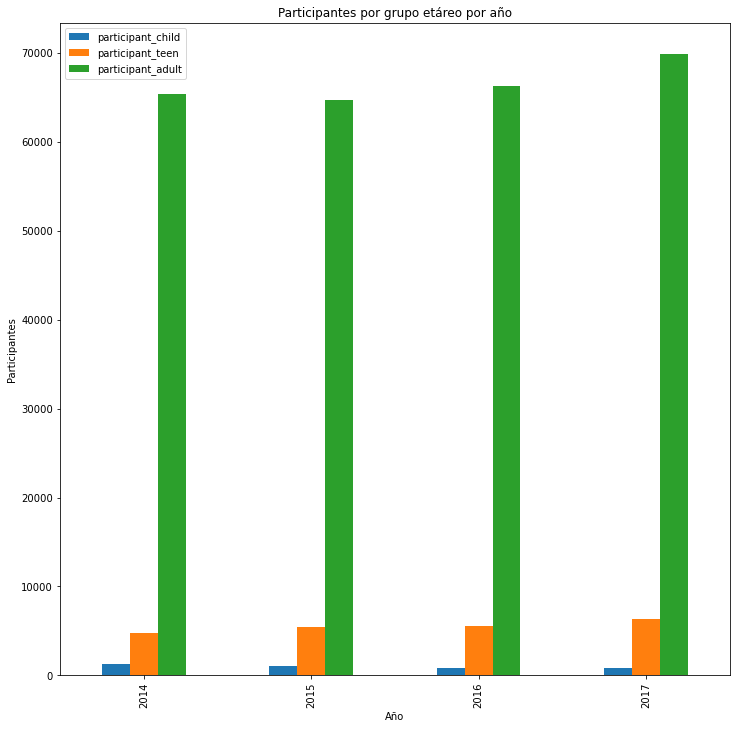

In [54]:
#participantes por grupo etáreo por año
gun_violence = gun_violence.reset_index(drop=True)
ge_año = gun_violence.groupby(['year']).sum()
ge_año[['participant_child','participant_teen','participant_adult']].plot.bar(figsize=(12, 12))
plt.xlabel('Año')
plt.ylabel('Participantes')
plt.title('Participantes por grupo etáreo por año')

Text(0.5, 1.0, 'Participantes por tipo por año')

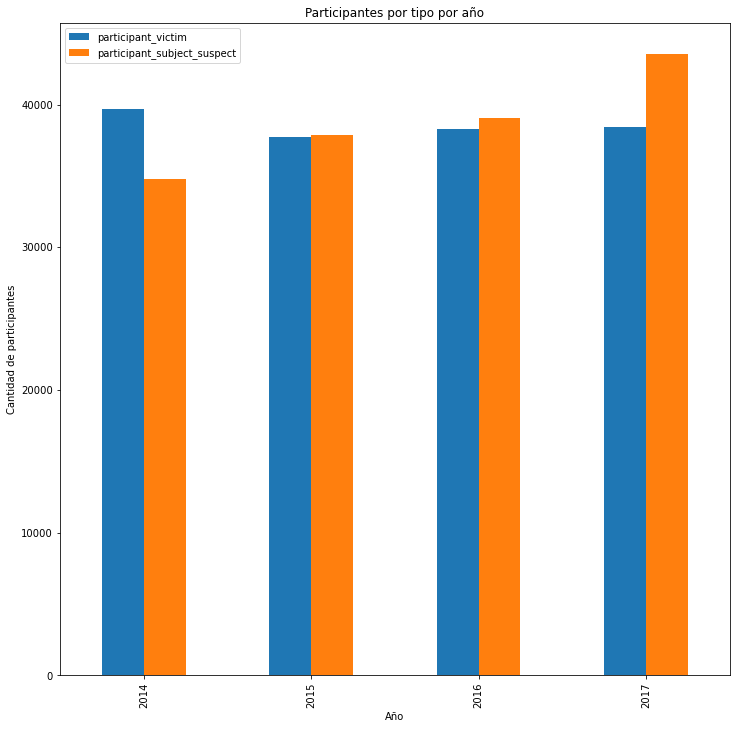

In [56]:
#participantes por tipo por año
gun_violence = gun_violence.reset_index(drop=True)
tipo_año = gun_violence.groupby(['year']).sum()
tipo_año[['participant_victim','participant_subject_suspect']].plot.bar(figsize=(12, 12))
plt.xlabel('Año')
plt.ylabel('Cantidad de participantes')
plt.title('Participantes por tipo por año')

Text(0.5, 1.0, 'Participantes por estado por año')

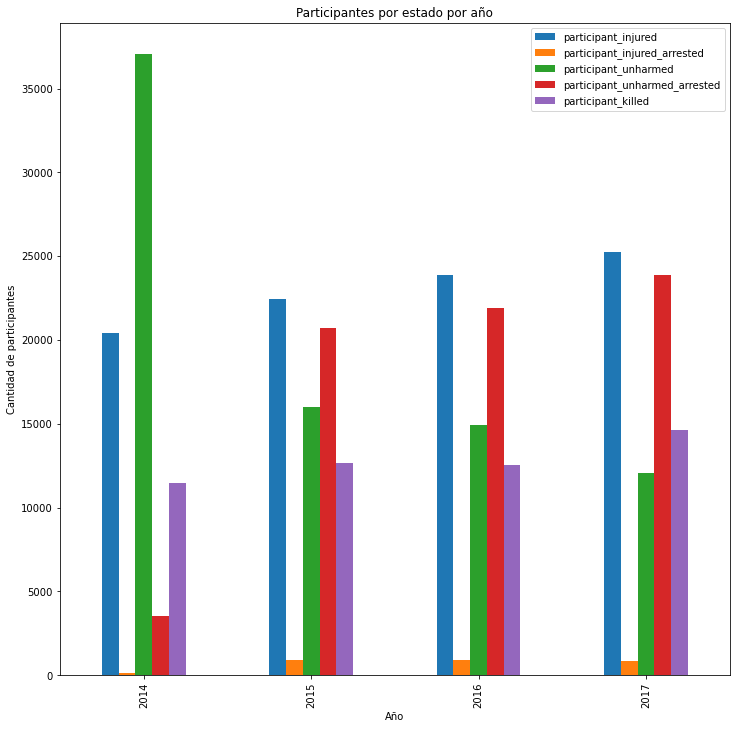

In [57]:
#participantes por status por año
gun_violence = gun_violence.reset_index(drop=True)
status_año = gun_violence.groupby(['year']).sum()
status_año[['participant_injured','participant_injured_arrested',	'participant_unharmed',	'participant_unharmed_arrested',	'participant_killed']].plot.bar(figsize=(12, 12))
plt.xlabel('Año')
plt.ylabel('Cantidad de participantes')
plt.title('Participantes por estado por año')

Text(0.5, 1.0, 'Participantes por grupo etáreo por estado')

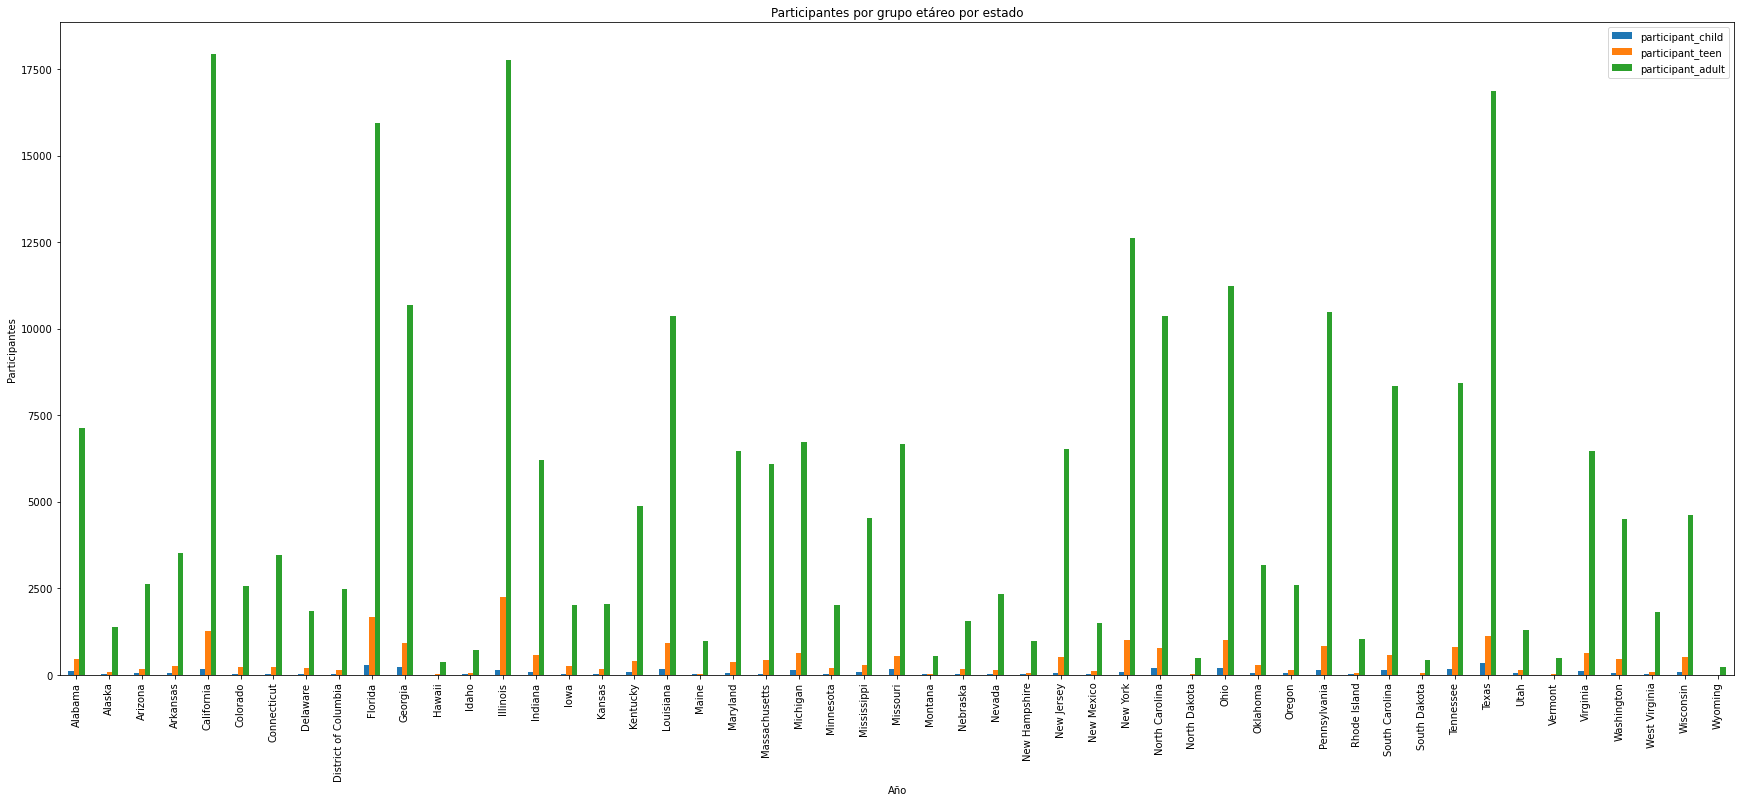

In [58]:
#participantes por grupo etáreo por estado
gun_violence = gun_violence.reset_index(drop=True)
ge_state = gun_violence.groupby(['state']).sum()
ge_state[['participant_child','participant_teen','participant_adult']].plot.bar(figsize=(30, 12))
plt.xlabel('Año')
plt.ylabel('Participantes')
plt.title('Participantes por grupo etáreo por estado')

Text(0.5, 1.0, 'Participantes por sexo por año')

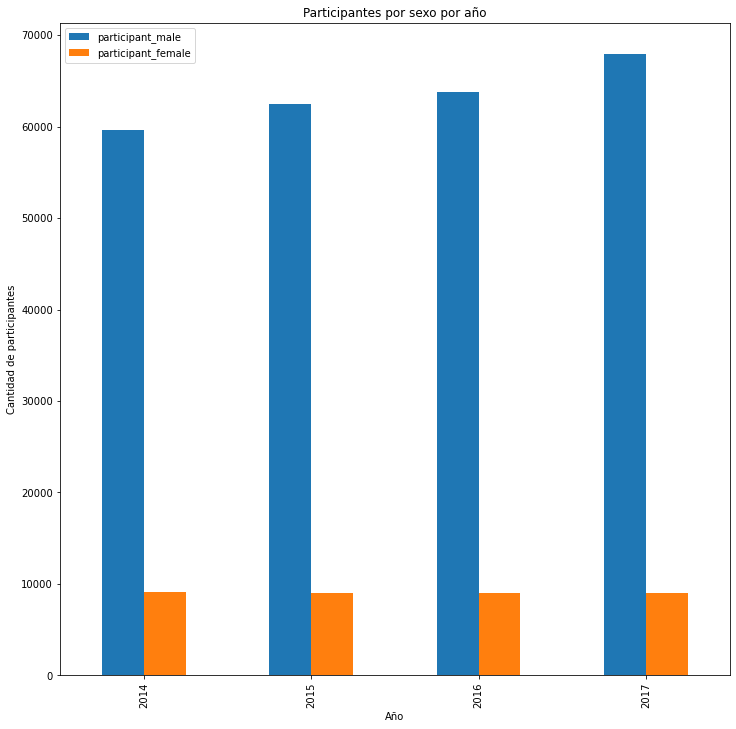

In [59]:
#participantes por sexo por año
gun_violence = gun_violence.reset_index(drop=True)
sexo_año = gun_violence.groupby(['year'])[['participant_male','participant_female']].sum()
sexo_año.plot.bar(figsize=(12, 12))
plt.xlabel('Año')
plt.ylabel('Cantidad de participantes')
plt.title('Participantes por sexo por año')

Text(0.5, 1.0, 'Participantes por grupo etáreo por año')

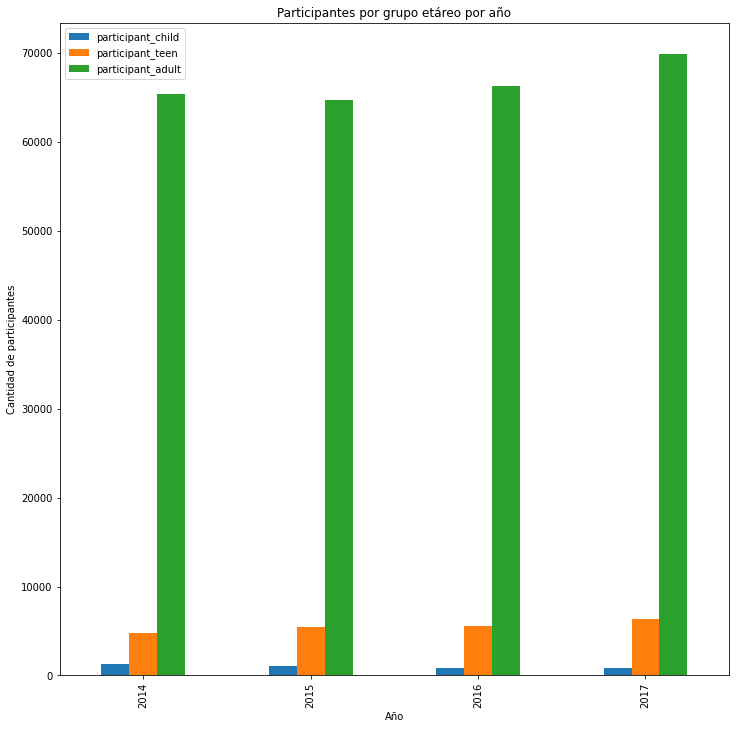

In [ ]:
#participantes por edad por año
gun_violence = gun_violence.reset_index(drop=True)
sexo_año = gun_violence.groupby(['year'])[['participant_child','participant_teen','participant_adult']].sum()
sexo_año.plot.bar(figsize=(12, 12))
plt.xlabel('Año')
plt.ylabel('Cantidad de participantes')
plt.title('Participantes por grupo etáreo por año')

Text(0.5, 1.0, 'Muertos y heridos por mes')

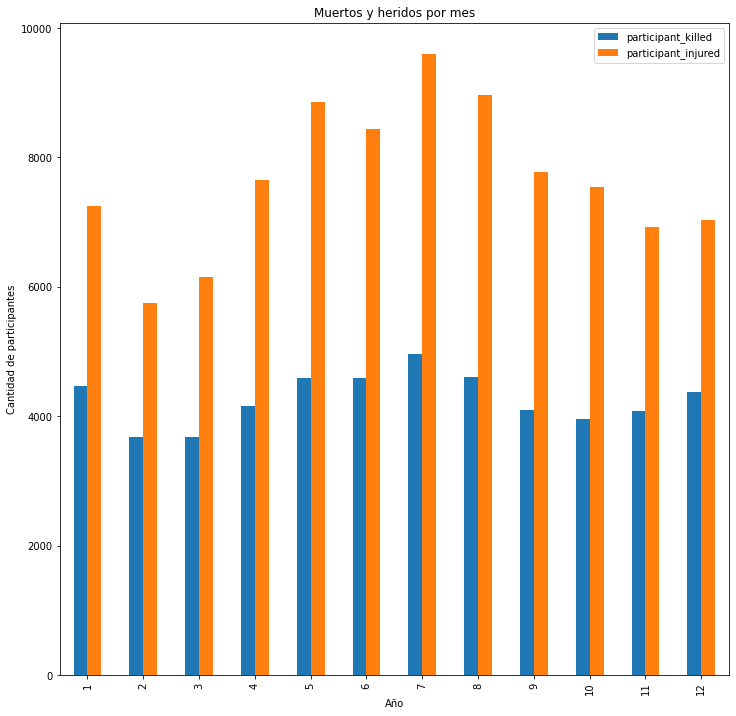

In [ ]:
#muertos y heridos por mes
gun_violence = gun_violence.reset_index(drop=True)
sexo_año = gun_violence.groupby(['month'])[['participant_killed','participant_injured']].sum()
sexo_año.plot.bar(figsize=(12, 12))
plt.xlabel('Año')
plt.ylabel('Cantidad de participantes')
plt.title('Muertos y heridos por mes')

# Segundo grupo de conclusiones

**1) Existe un mes o época del año con mayor cantidad de sucesos y por ende con mayor propensión a la violencia con armas?**

El mes de Julio es aquel que presenta mayor cantidad de muertos y heridos. El período comprendido entre los meses de Junio a Setiembre es aquel donde se registran mayor cantidad de heridos y muertos en estos episodios. 

**2) Dados los últimos episodios de tiroteos masivos en universidades y enfrentamientos entre bandas callejeras, entendemos que debería existir un alto nivel de participación de adolescentes en estos hechos.**

Nuestra hipótesis es incorrecta, la participación de menores de edad en estos episodios es por mucha diferencia, menor que la participación de adultos.

**3) ¿Se da una mayor cantidad de muertos que de heridos en estos episodios violentos?**

La cantidad de muertes es sensiblemente menor a la cantidad de gente herida en estos episodios, por tanto no, la cantidad de muertos no supera a la de heridos en líneas generales.

**4) Sabemos por estadística general que los individuos de sexo masculino son mas propensos a la violencia en términos generales que aquellos de sexo femenino. ¿Se mantiene esta tendencia en nuestro análisis?**

La tendencia a ver mayor cantidad de incidentes violentos con participación de individuos de sexo masculino es una tendencia que nuestros datos pueden confirmar. La cantidad de mujeres que participan de este tipo de eventos es ínfima comparada con el número de hombres. 